# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [48]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0
2024-01-26 00:00:00-05:00,4888.910156,4906.689941,4881.470215,4890.970215,3353400000,0.0,0.0
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,0.0,0.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,0.0,0.0
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,0.0,0.0


In [49]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [50]:
dfo.options  #to get the date of different expiration time

('2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-08',
 '2024-03-11',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [51]:
dfo_exp = dfo.option_chain(dfo.options[1])

In [52]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240202C03700000,2024-01-19 15:42:38+00:00,3700.0,1102.50,1162.5,1169.5,0.0,0.0,1.0,0,2.381291,True,REGULAR,USD
1,SPXW240202C03750000,2024-01-29 20:00:06+00:00,3750.0,1158.17,1112.2,1119.2,0.0,0.0,1.0,0,2.277470,True,REGULAR,USD
2,SPXW240202C03850000,2024-01-24 14:31:22+00:00,3850.0,1046.53,1012.3,1019.2,0.0,0.0,1.0,0,2.088994,True,REGULAR,USD
3,SPXW240202C03900000,2024-01-29 17:38:35+00:00,3900.0,1003.35,962.4,969.3,0.0,0.0,2.0,0,1.997406,True,REGULAR,USD
4,SPXW240202C04000000,2024-01-30 20:03:05+00:00,4000.0,931.28,862.4,869.4,0.0,0.0,1.0,0,1.812257,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [53]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(1+df.Close.pct_change())
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol*(m.sqrt(252))

    return vol

In [54]:
vol = annual_vol(df)
vol

0.19244270320739335

# **BLACK-SCHOLES MODEL**


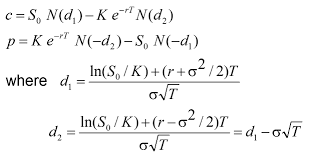

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [55]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    elif option == 'put':
        premium = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return premium

In [56]:
N = 100
T = 8.0/365
t = T/N

In [57]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
3700.0,1145.650121
3750.0,1095.650124
3850.0,995.650130
3900.0,945.650133
4000.0,845.650139


In [58]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
3700.0,1102.50
3750.0,1158.17
3850.0,1046.53
3900.0,1003.35
4000.0,931.28


In [59]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
3700.0,1145.650121,1102.50
3750.0,1095.650124,1158.17
3850.0,995.650130,1046.53
3900.0,945.650133,1003.35
4000.0,845.650139,931.28
4100.0,745.650145,759.94
4125.0,720.650146,760.38
4150.0,695.650148,750.81
4200.0,645.650157,707.08
4210.0,635.650161,697.08


<Axes: >

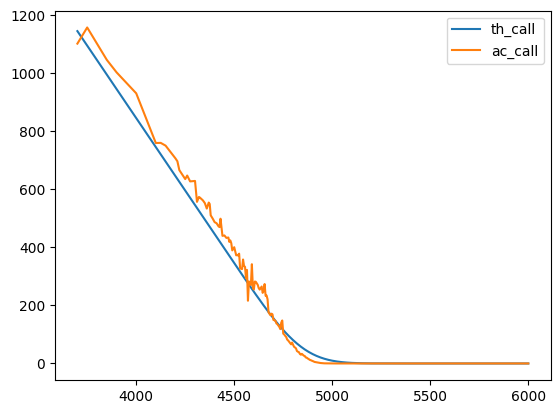

In [60]:
call.plot() #plotting the actual and theoretical call prices

In [61]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
1600.0,0.000000e+00
1800.0,1.234064e-264
2000.0,1.166019e-211
2200.0,7.633034e-169
2400.0,5.465390e-134


In [62]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.tail()

,ac_put
strike,
5010.0,138.16
5020.0,93.74
5025.0,100.97
5050.0,187.75
5060.0,166.13


In [63]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4970.0,138.666478,116.87
4975.0,142.774126,111.61
4980.0,146.927057,117.50
4990.0,155.362586,134.10
5000.0,163.960747,147.95
5010.0,172.709367,138.16
5020.0,181.596521,93.74
5025.0,186.088412,100.97
5050.0,208.975539,187.75
5060.0,218.305545,166.13


<Axes: >

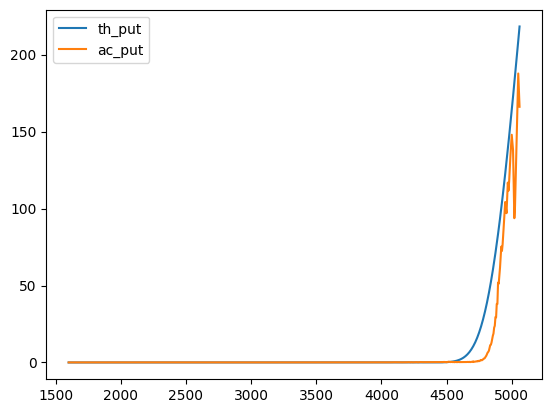

In [64]:
put.plot()